<a href="https://colab.research.google.com/github/Albina1310/Albina1310/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B1%D0%B8%D0%B7%D0%BD%D0%B5%D1%81_%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ развлекательного приложения Procrastinate Pro+.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Задача — разобраться в причинах и помочь компании выйти в плюс.**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Описание данных**
В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**План действаий:**

1. Откроем файлы, изучим информацию и выполним предобработку
2. Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии
- Функция для создания пользовательских профилей - get_profiles()
- Функция для подсчёта удержания - get_retention()
- Функция для подсчёта конверсии - get_conversion()
- Функция для подсчёта LTV - get_ltv()
- Функция для сглаживания данных - filter_data()
- Функция для построения графика удержания - plot_retention()
- Функция для построения графика конверсии - plot_conversion()
- Функция для визуализации LTV и ROI - plot_ltv_roi
3. Проведем исследовательский анализ данных:
- Составим профиль пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
4. Маркетинг
- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
5. Оценим окупаемость рекламы
- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы: Окупается ли реклама, направленная на привлечение пользователей в целом? Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? Чем могут быть вызваны проблемы окупаемости?
6. Общий вывод

## Откроем файлы, изучим информацию и выполним предобработку

In [4]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')# таблица с данными о визитах
    orders = pd.read_csv('/datasets/orders_info_short.csv')# таблица с данными о заказах
    costs = pd.read_csv('/datasets/costs_info_short.csv')# таблица с данными о расходах

In [6]:
# посмотрим общую информацию данных
display(visits, orders, costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
50650,703778684183,United States,iPhone,organic,2019-06-23 17:15:51,2019-06-23 17:24:12
50651,983066155502,United States,iPhone,TipTop,2019-06-23 18:46:31,2019-06-23 19:54:05
50652,944969159278,United States,Mac,FaceBoom,2019-06-23 20:20:41,2019-06-23 21:04:40
50653,480871430223,United States,iPhone,FaceBoom,2019-06-23 11:08:35,2019-06-23 11:26:33


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [7]:
# преобразуем к единому регистру названия столбцов во всех таблицах
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()
# так же лучше для дальнейшей работы с данными в названиях колонок поставить нижнее почеркивание между словами
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50655 entries, 0 to 50654
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        50655 non-null  int64 
 1   region         50655 non-null  object
 2   device         50655 non-null  object
 3   channel        50655 non-null  object
 4   session_start  50654 non-null  object
 5   session_end    50654 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column  

In [8]:
# в столбцах с датой нужно поменять тип данных на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
# пропусков нет в данных, посмотрим на дубликаты
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [10]:
# посмотрим уникальные значения в столбцах region, device, visits['channel'], costs['channel'], orders['revenue']
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())
print(costs['channel'].unique())
print(orders['revenue'].unique())

['United States']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'Ro']
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']
[ 4.99  5.99  9.99 49.99 19.99]


**Вывод:**

Предоставлены 3 таблицы с данными:
1. В visits - данные о визитах и в ней 309301 строк и 6 столбцов. В каждой из колонок следующее:
- в 'region' указаны страны: США, Великобритания, Франция, Германия;
- в 'device' указаны устройство, с которого запускается приложение: 'iPhone', 'Mac', 'Android', 'PC';
- 'channel' показывает через какие источники рекламы было загружено приложение в устройство: 'organic' - то есть пользователь самостоятельно загрузил приложения не используя рекламный источник, 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom', 'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner', OppleCreativeMedia', 'lambdaMediaAds'.
2. В orders - хранятся данные кто и когда сделал покупку, состоит из 40212 строк и 3 столбцов. Сделать заказ можно на сумму: 4.99, 5.99, 9.99, 49.99 либо 19.99.
3. Таблица costs имеет данные о расходах на рекламу - 1800 строк и 3 столбца. Рекламными источниками являются те же что и в таблице visits, кроме 'organic' - трат с нашей стороны не было, клиент сам пришел.

Выполнили предобработку наших таблиц: привели к единому стилю названия столбцов, также проверили на наличие пропусков- их нет, и на наличие дубликатов - их тоже нет. Посмотрели уникальные значения колонок и с ними все впорядке.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI.

### Функция для создания пользовательских профилей - get_profiles()

Чтобы проще было делить клиентов на когорты, лучше заранее составить их **профили** — таблицу с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство. Сосздадим функцию,которой передадим наши таблицы и она вернет нам профили пользователей с учетом траты на рекламу.

In [11]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


### Функция для расчёта удержания - get_retention()

Прежде, чем создать функцию, расшифруем что она значит. **Retention Rate - "коэффициент удержания"**.

Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды. Retention Rate — важнейший показатель для компаний, которые зарабатывают с пользователей напрямую. Например, для интернет-магазинов или сервисов, работающих по подписке. Ведь чем дольше привлечённый рекламой или другими способами клиент пользуется продуктом, тем больше потенциальная выручка.
Чтобы рассчитать Retention Rate, количество активных пользователей на текущий день делят на количество активных пользователей на первый день.

При расчёте Retention Rate и других метрик учитывают:
**Момент анализа.** Это момент времени, в который вы смотрите на данные.
**Горизонт анализа.** Максимальный лайфтайм, который вы анализируете.
Момент анализа ограничивает возможный горизонт анализа данных.

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчёта конверсии - get_conversion()

Применительно к когортному анализу конверсия, или коэффициент конверсии (**Conversion Rate**), — это процент пользователей когорты, совершивших какое-нибудь действие. Например, зарегистрировавшихся на сайте, кликнувших по баннеру или добравшихся до определённого уровня в мобильной игре. Чаще всего считают главную для бизнеса конверсию — из неплатящих пользователей в платящие. Чем выше процент покупателей в когортах, тем лучше для компании.Чтобы узнать Conversion Rate, накопленное количество новых покупателей на текущий лайфтайм делят на размер когорты, то есть количество активных пользователей на первый день.

Коэффициент конверсии никогда не снижается. Это заложено в формуле: общее количество новых покупателей не может быть меньше значения предыдущего дня, ведь при расчёте используется сумма с накоплением. Конверсия не может превышать 100%. Например, если пользователями приложения стали 100 человек, то покупателями никак не могут стать 120 из них.

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### функция для расчёта LTV и ROI и CAC -  get_ltv()

**LTV, или Lifetime Value**, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. На практике чаще анализируют LTV за определённый срок — первые 1, 3, 7 и 14 дней после регистрации. В рамках когортного анализа для расчёта LTV выручку с накоплением за текущий день делят на размер когорты, то есть количество активных пользователей на первый день.

**CAC, или Customer Acquisition Cost**, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг. Главный принцип успешных инвестиций в маркетинг и не только — затраты не должны превышать полученный в результате доход. Если клиенты приносят компании миллионы, а на их привлечение она тратит миллиарды, это принесёт лишь убытки. Рассчитывается стоимость привлечения новых пользователей: поделим рекламные расходы на размеры когорт. Когорта окупается, если кривая LTV пересекает линию САС. То есть когда средняя накопительная выручка от одного клиента превышает средние затраты на его привлечение.

**ROI, или Return On Investment**, — окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC. Ещё говорят: на сколько процентов «окупились» клиенты. Когда когорт мало, сравнить на графике LTV и CAC каждой несложно. Однако с ростом числа когорт линии начинают сливаться, и читать график становится трудно. Для таких случаев подойдёт более универсальная метрика — возврат на инвестиции, или ROI.
В маркетинге метрику ROI называют ROMI, или Return On Marketing Investment, чтобы не путать его с ROI всего бизнеса. В этом проекте и далее мы будем использовать понятие ROI, так как речь пойдёт только об инвестициях в маркетинг, и риска спутать термины нет. В когортном анализе ROI рассчитывают делением LTV на CAC. ROI показывает, окупилась ли когорта в каждый лайфтайм: если возврат на инвестиции составил 100%, то все потраченные на рекламу деньги вернулись в компанию. На график достаточно нанести лишь одну пунктирную линию — порог окупаемости на уровне 100%.

Некоторые свойства LTV, CAC и ROI, которые помогут выявить ошибку:
- LTV и ROI никогда не снижаются,
- CAC когорты — постоянная величина для всех лайфтаймов.

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция для сглаживания фрейма - filter_data()

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### Функция для построения графика удержания - plot_retention()

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии - plot_conversion()

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI  - plot_ltv_roi()

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Вывод:**

Созданы функции для расчета и анализа, а также функции для визуализации показателей.



## Исследовательский анализ данных

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [19]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles, profiles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28154 entries, 0 to 28153
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           28154 non-null  int64         
 1   first_ts          28154 non-null  datetime64[ns]
 2   channel           28154 non-null  object        
 3   device            28154 non-null  object        
 4   region            28154 non-null  object        
 5   dt                28154 non-null  object        
 6   month             28154 non-null  datetime64[ns]
 7   payer             28154 non-null  bool          
 8   acquisition_cost  28154 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ MB


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-09 17:29:23,False,0.000000
2,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-11 19:18:43,False,1.128205
3,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-11 21:13:47,False,0.250435
4,92610596,2019-05-31 21:28:36,organic,Android,United States,2019-05-31,2019-05-31 21:28:36,False,0.000000
...,...,...,...,...,...,...,...,...,...
28149,999879315295,2019-05-05 05:04:39,organic,iPhone,United States,2019-05-05,2019-05-05 05:04:39,False,0.000000
28150,999884407339,2019-05-22 13:45:21,organic,iPhone,United States,2019-05-22,2019-05-22 13:45:21,False,0.000000
28151,999904695968,2019-05-19 01:29:17,FaceBoom,Mac,United States,2019-05-19,2019-05-19 01:29:17,False,1.109483
28152,999916536269,2019-06-09 12:27:24,TipTop,iPhone,United States,2019-06-09,2019-06-09 12:27:24,False,1.880000


None

In [20]:
max_date = profiles['dt'].max() # минимальная дата привлечения пользователей
min_data = profiles['dt'].min() # максимальная дата привлечения пользователей
print(f'Минимальная дата привлечения пользователей: {min_data}')
print(f'Максимальная дата привлечения пользователей: {max_date}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-06-22


Сделали профили пользователей, составив таблицу из 9 столбцов и 15008 строк. В нее входят колонки: "user_id" - индитификатор пользователя, "first_ts" - дата первого входа, "channel" - источник перехода в приложение пользователя, "device" - устройство, "region" - страна, "dt" - дата, "month" - месяц, "payer" - платящий или неплатящий пользователь, "acquisition_cost" - сколько на данного пользователя было расходов. Минимальная дата привлечения: 1 мая 2019, максимальная дата привлечения: 27 октября 2019.

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [21]:
# создадим функцию, которая будет выводить таблицу с расчетом доли платящих, меняя только сегмент
def profiles_dimensions(profiles, dimensions=[]):
    share = profiles.pivot_table(index=dimensions, values='user_id', aggfunc='count')
    share['payer'] = profiles.query('payer == True').groupby(dimensions)['user_id'].count()
    share['share'] = 100*(share['payer'] / share['user_id'])
    return share

# применим функцию и создадим таблицу с расчетом доли платящих в разбивке по странам
share = profiles_dimensions(profiles, dimensions=['region'])
display(share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'}))

,user_id,payer,share
region,,,
United States,28154,1730,6.1%


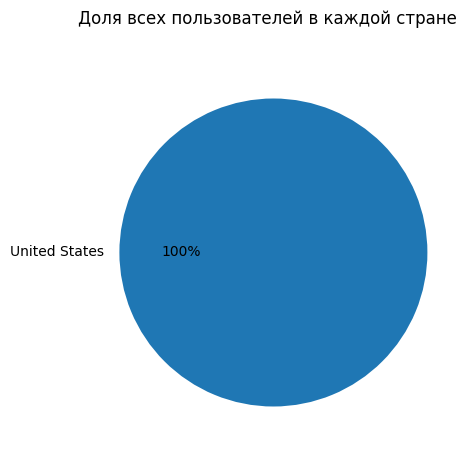

In [22]:
# построим график и визуально оценим, где больше всего пользователей нашего приложения
fig,(ax1) = plt.subplots(figsize=(5, 5))
fig.suptitle('Доля всех пользователей в каждой стране', fontsize=12)
ax1.pie(share['user_id'], labels=share['user_id'].index, autopct='%.0f%%');

In [23]:
# посмотрим сколько всего платящих от общего числа
payer = share['payer'].sum()
total = share['user_id'].sum()
print(f'Всего пользователей: {total}')
print(f'Платящих пользователей: {payer}, т.е. {round(100*(payer/total), 1)}%')

Всего пользователей: 28154
Платящих пользователей: 1730, т.е. 6.1%


Таким образом приложением пользуются больше всего - 67% в США, а платящих пользователей из этой доли всего 6,9%. Всего платящих 8881, т.е. 5,9%, что на первый взгяд недостаточно для окупаемости вложений. Далее будем это выяснять.

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

,user_id,payer,share
device,,,
iPhone,12664,796,6.3%
Android,5696,351,6.2%
Mac,6891,413,6.0%
PC,2903,170,5.9%


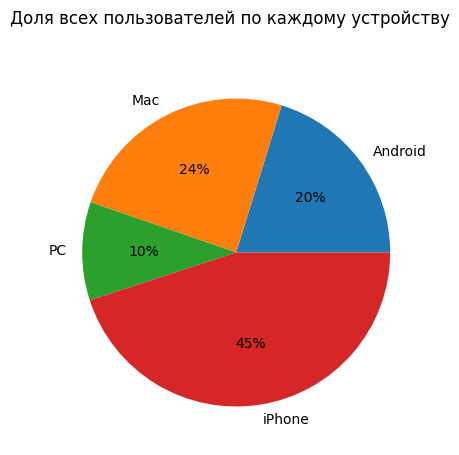

In [24]:
# создадим таблицу используя ранее созданную функцию с расчетом доли платящих в разбивке по устройствам
share = profiles_dimensions(profiles, dimensions=['device'])
display(share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'}))
print()
# построим график и визуально оценим, из какого устройство больше всего выходят в приложение пользователеи
fig,(ax1) = plt.subplots(figsize=(5, 5))
fig.suptitle('Доля всех пользователей по каждому устройству', fontsize=12)
ax1.pie(share['user_id'], labels=share['user_id'].index, autopct='%.0f%%');


Наибольшее число пользователей - 36% выходят в приложение через "iPhone" и доля платящих из нее всего 6,2% (3382- наибольшее число из всех устройств)

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

,user_id,payer,share
channel,,,
FaceBoom,6436,790,12.3%
TipTop,4334,426,9.8%
RocketSuperAds,1488,130,8.7%
MediaTornado,1464,55,3.8%
YRabbit,1449,47,3.2%
organic,12983,282,2.2%


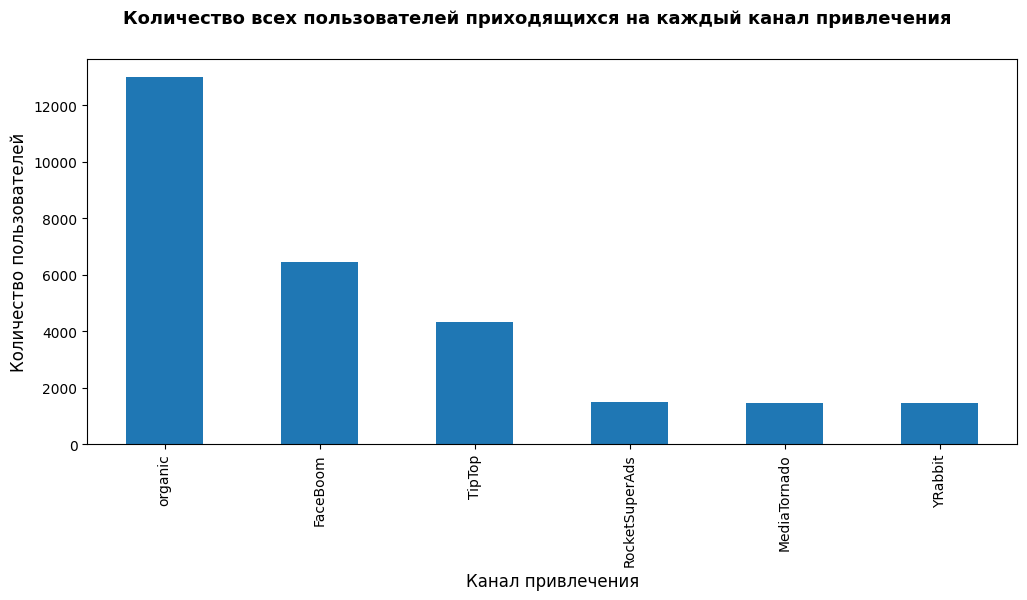

In [25]:
# создадим таблицу с расчетом доли платящих в разбивке по источники привлечения
share = profiles_dimensions(profiles, dimensions=['channel'])
display(share.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'}))
print()
# построим график и визуально оценим, из каких каналов больше всего заходят в приложение
share['user_id'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.suptitle('Количество всех пользователей приходящихся на каждый канал привлечения', fontsize=13, fontweight="bold")
plt.xlabel("Канал привлечения", fontsize=12)
plt.ylabel("Количество пользователей", fontsize=12);

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тут абсолютно уместно добавила другой тип графика, очень хорошо </div>

По графику видим, что много пользователей ~ 57 т. приходят сами, они загружают приложение не через рекламные ссылки. Но доля платящих из этого числа самая маленькая 2,1%(~1 т.) В то время как через канал FaceBoom, где вдвое меньше клиентов, доля платящих из них 12,2%. Также можно отметить хорошую долю платящих приносят каналы: AdNonSense и lambdaMediaAds, хотя на графике мы видим наименьшее число всех пользователей в них.

*В итоге можем выделить по числу платящих три канала: FaceBoom(12,2% - 3557), TipTop( 9,6% - 1878) и organic (2,1% - 1160)*

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> По каналам доли также посчитаны безошибочно, и как и в шагах выше дополнен график для наглядности. Но тут как ты уже обратила внимание, большую долю всех пользователей занимает органика, можешь поделиться своими мыслями как продуктовый аналитик, похожа-ли такая картина на правду, чем это может быть хорошо/плохо для нашего продукта? </div>

**Вывод:** Составили профиля пользователей и выяснили, что наиболее популярно приложение у платящих (всех взятых тоже) клиентов из США, которые в основном сидят в нем из "iPhone" и загружают приложение самостоятельно, либо из FaceBoom и TipTop. Всего платящих 8881 из 150 008, что составляет 5,9%.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И в конце указали, как вообще выглядит типовой портрет нашего покупателя по каналу, стране и устройству </div>

## Маркетинг

### Посчитаем общую сумму расходов на маркетинг

In [26]:
# сумма расходов на маркетинг
print(costs['costs'].sum())

105497.30000000002


Общая сумма расходов на маркетинг составляет 105 497.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Определили общую сумму трат </div>

### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [27]:
# сумма расходов по рекламным источникам
costs_channel = costs.groupby('channel').agg({'costs': 'sum'})
costs_channel['share'] = 100*(costs_channel['costs']/costs_channel['costs'].sum())
display(costs_channel.sort_values(by = 'share', ascending=False))

,costs,share
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


Наибольшее число расходов на рекламу по каналу TipTop - 52%, а на втором месте стоит канал FaceBoom - 31%. Получается на 2 канала уходит более 80% всех расходов на рекламу - это очень много. При этом ранее мы выяснили, что TipTop приносит платящих пользователей почти в 2 раза меньше чем FaceBoom. Возникает предположение, что рекламный источник TipTop и возможно FaceBoom не окупаются, в дальнейшем мы это выясним.

### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [28]:
# допоплним таблицу расходов столбцами 'месяц' и 'неделя'  для дальнейшего анализа
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [29]:
# сгруппируем расходы по месяцам и неделям
costs_month = costs.pivot_table(index=['month'], columns = 'channel', values='costs', aggfunc='sum')
costs_week = costs.pivot_table(index=['week'], columns = 'channel', values='costs', aggfunc='sum')
display(costs_week.head(), costs_month.head())

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


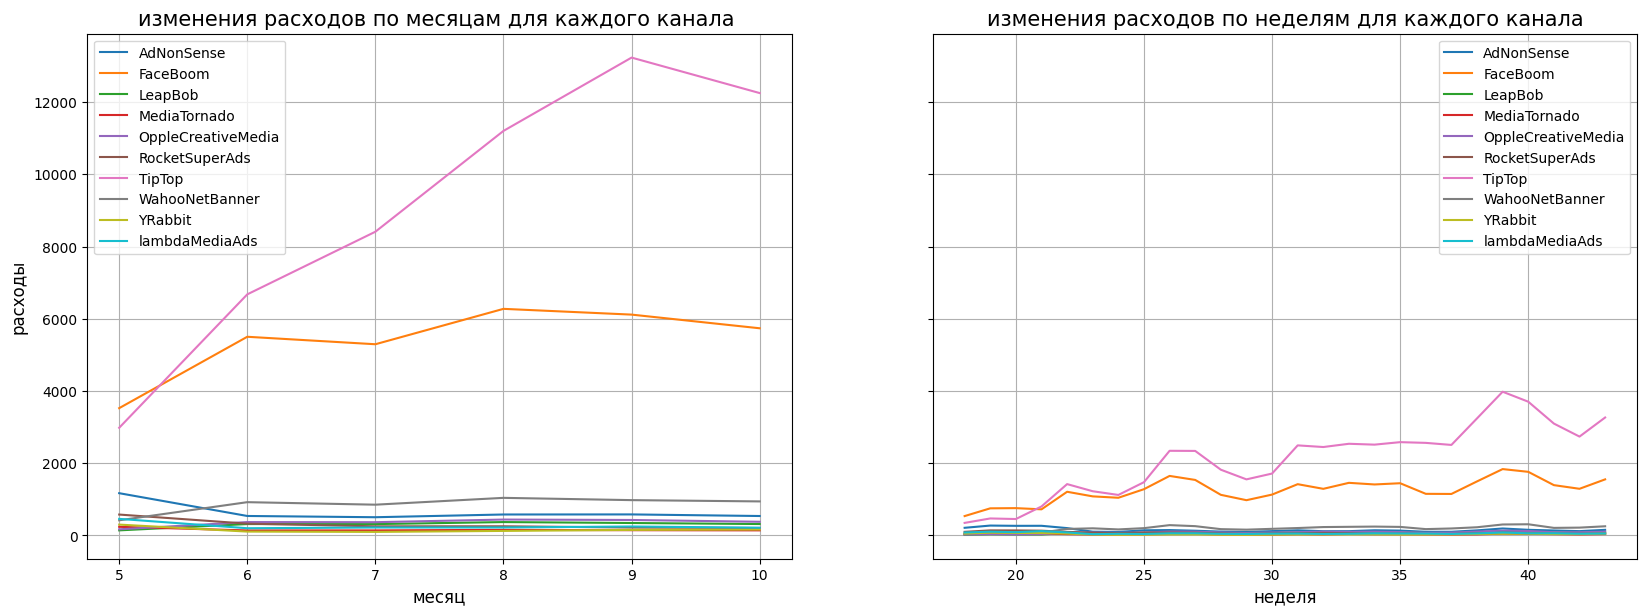

In [30]:
# построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику
plt.figure(figsize=(20, 15))

ax1 = plt.subplot(2, 2, 1)
costs_month.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('месяц', fontsize=12)
plt.ylabel('расходы', fontsize=12)
plt.title('изменения расходов по месяцам для каждого канала ', fontsize=15)

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
costs_week.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('неделя', fontsize=12)
plt.title('изменения расходов по неделям для каждого канала', fontsize=15)

plt.show()

Выбиваются анамально 2 канала из всех: 'TipTop', 'FaceBoom'. На них приходитя более 80% всех рекламных расходов, поэтому такой результат на графиках.

Далее посмотрим на источники без этих 2-х выбивающихся.

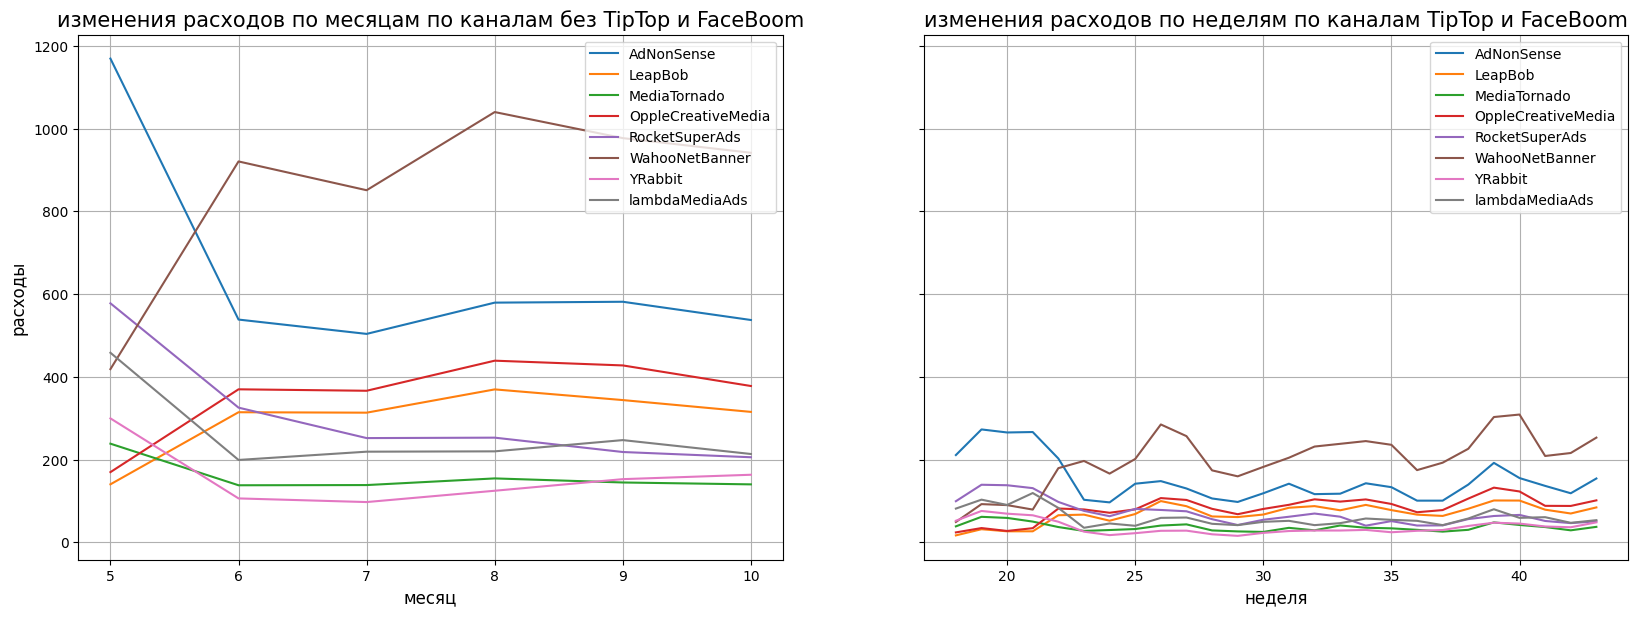

In [31]:
# построим визуализацию динамики изменения расходов без выбивающихся каналдов 'TipTop', 'FaceBoom' во времени по источникам
costs_month = costs_month.drop(columns = ['TipTop', 'FaceBoom'], axis = 1)
costs_week = costs_week.drop(columns = ['TipTop', 'FaceBoom'], axis = 1)

plt.figure(figsize=(20, 15))

ax1 = plt.subplot(2, 2, 1)
costs_month.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('месяц', fontsize=12)
plt.ylabel('расходы', fontsize=12)
plt.title('изменения расходов по месяцам по каналам без TipTop и FaceBoom', fontsize=15)

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
costs_week.plot(grid=True, ax=ax2)
plt.legend()
plt.xlabel('неделя', fontsize=12)
plt.title('изменения расходов по неделям по каналам TipTop и FaceBoom', fontsize=15)

plt.show()

По графику мы видим, что рекламный источник TipTop очень сильно выбивается от остальных и затраты на него увеличиваются от месяца к месяцу, в то время как на FaceBoom резких скачков трат нет, хотя они тоже очень большие в целом, и в среднем остаются на одном уровне во времени.

Убрав выбивающиеся из общей картины каналы TipTop, FaceBoom увидели остальные источники рекламы поближе. Практически во всех каналах  в мае произошло снижение и стоимость на протяжении остальных месяцев остается стабильной, кроме WahooNetBanner - расходы у него выросли и понемногу повышаются.

### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

Для начала уберем из профилей канал "organic", так как на него не было потрачено денег и чтобы анализ был более точным.

,cac
channel,
TipTop,1.626857
FaceBoom,1.110255
RocketSuperAds,0.544113
YRabbit,0.258634
MediaTornado,0.224590


1.0355019444993738
0.7990034142290301


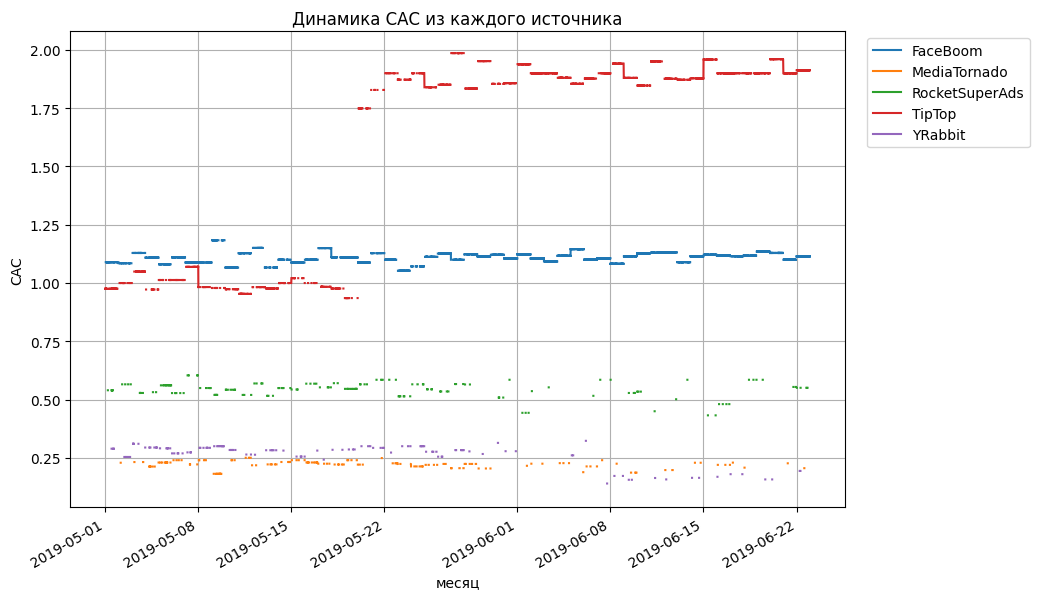

In [32]:
# убрала из профилей канал "organic" для более корректного анализа, далее будем его использовать
profiles = profiles.query('channel != "organic"')

# узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
cac = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'cac'})
display(cac.sort_values(by='cac', ascending=False))

# посмотрим расходы в среднем на одного пользователя в общем
print(profiles['acquisition_cost'].mean())

# посмотрим расходы в среднем на одного пользователя в общем, но без выбивающегося источника 'TipTop'
print(profiles.query('channel != "TipTop"')['acquisition_cost'].mean())

# построим графики для наглядного просмотра САС
profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(10, 7))
plt.ylabel('CAC')
plt.xlabel('месяц')
plt.title('Динамика САС из каждого источника')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Как и в анализе предыдущих пунктов выбивается рекламный источник TipTop, на одного пользователя из этого канала приходится 2.8, затем по 1.0 приходится на каналы FaceBoom и AdNonSense. В то время как на остальные каналы во много раз меньше, т.е. примерно в 0.3. Если брать среднюю по всем 10 каналом, то выходит - 1,12 на одного пользователя в общем. А если взять без учета выбивающихся TipTop источника, то выходит в среднем 0,68, то есть почти в 2 раза ниже. Также по графику видим как TipTop канал анамально выбивается из всех и растет со временем, в то время как остальные стабильны.

**Вывод:** В ходе анализа расходов на рекламу, был выявлен анамально выбивающийся источник из всех это TipTop. На него уходят большая часть расходов(52%), а платящих пользователей приходит меньше(1878) в сравнении с FaceBoom(3557). В FaceBoom расходы в общем почти вдвое меньше - 31%, но тоже достаточно много, а платящих клиентов в двое больше, чем у TipTop. Также если смотреть расходы на одного пользователя по источникам, то видим туже картину: у TipTop он составляет в среднем почти 2.8 и растет от месяца к месяцу,  а у остальных во времени все стабильно и расходы во много раз меньше(0.2-1.0).

Нужно внимательней присмотреться к рекламному источнику TipTop (также еще лучше посмотреть FaceBoom) и изменить маркетинговый подход к нему. Посмотреть причины увеличения расходов, ведь наибольшее число приходов и платящих пользователей не из него.

## Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Предположим, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

In [33]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14  # горизонт анализа

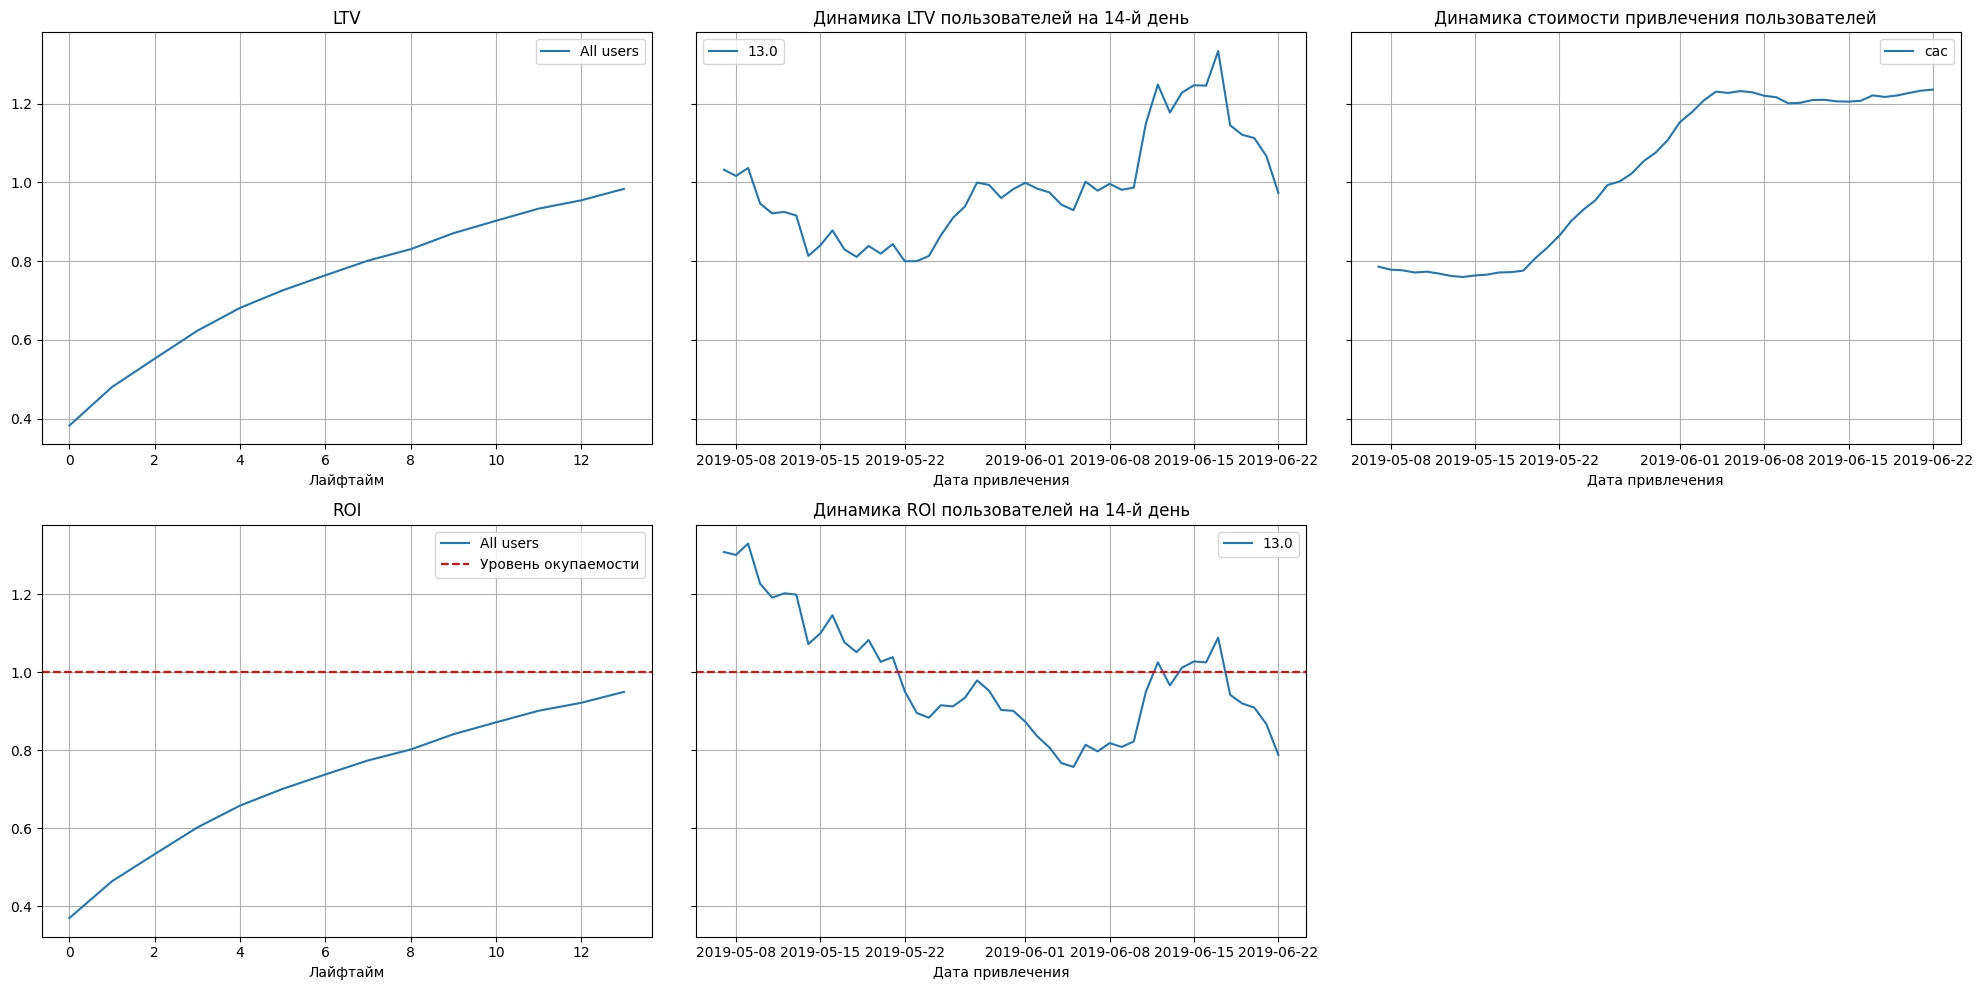

In [34]:
# считаем LTV и ROI применив функцию get_ltv()
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики применив функцию plot_ltv_roi()
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам мы видим, что реклама не окупается (ROI). Стоимость привлечения пользователей(САС) быстро растет и резкий скачек был в июне. CAC от месяца к месяцу идет быстро вверх. LTV стабильно растет, но существенно меньше и показатель окупаемости показывает нам это. На 14 день ROI снижается, начиная свой быстрый спад с июня месяца. Данные показатели показывают "не здоровый бизнес".

### Проверим конверсию, удержание  пользователей и динамику их изменения.

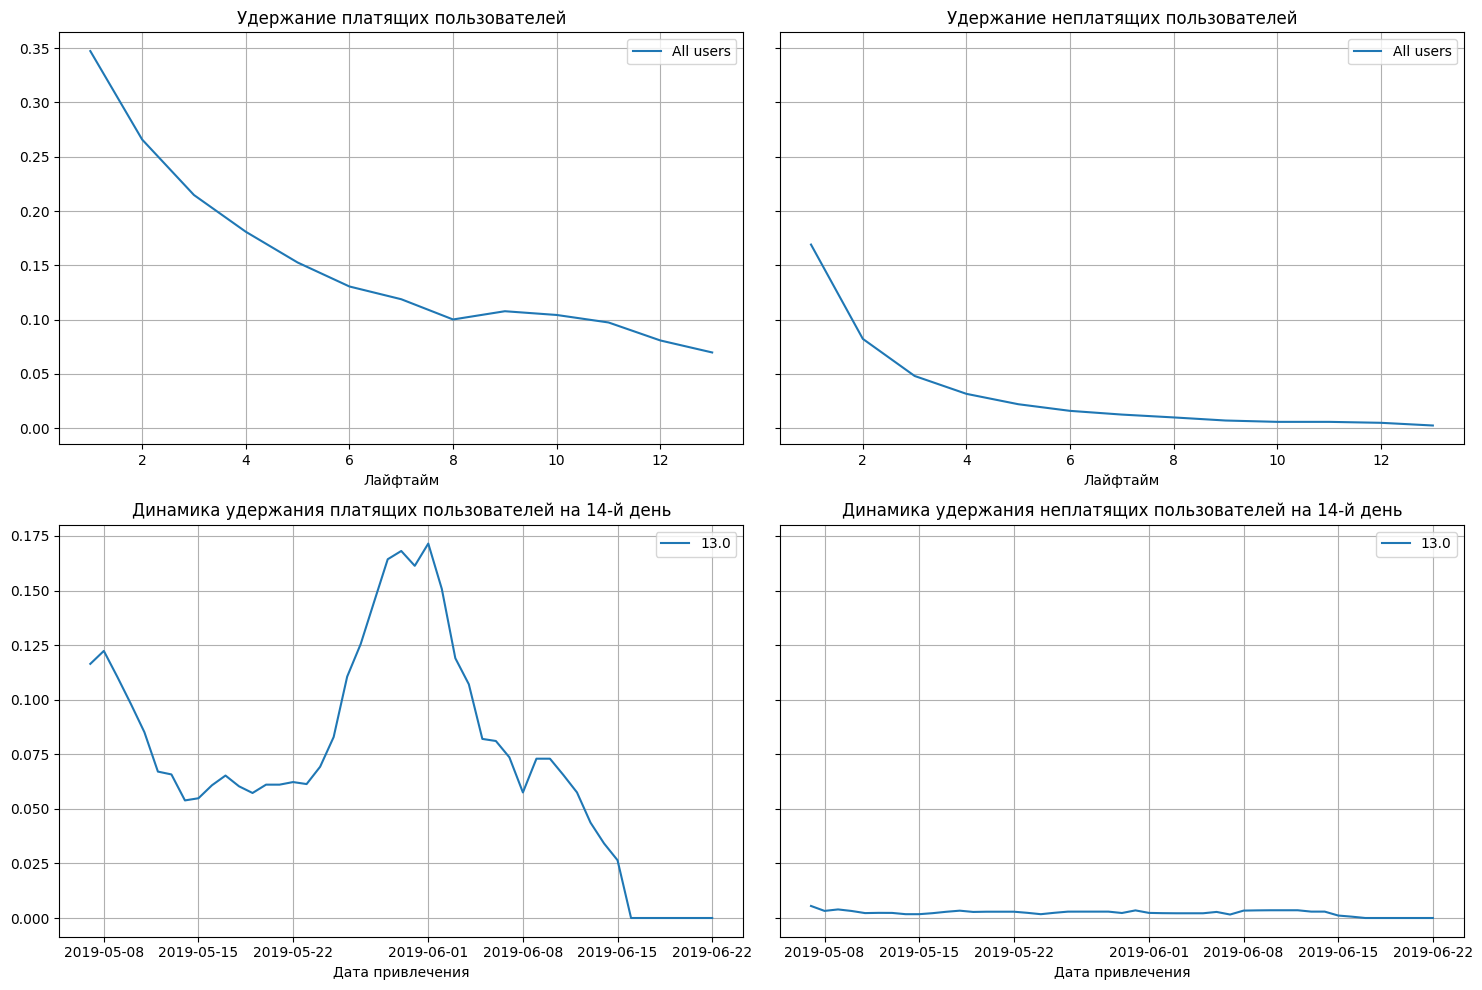

In [35]:
# считаем удержание в общем применив функцию get_retention()
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days)
# строим графики применив функцию plot_retention()
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание посчитано верно - кривая платящих пользователей находится выше, чем кривая неплатящих. Обе кривые постепенно снижаются и к концу 14 дня удержание платящих составляет 0.1, а не платящих практически ноль.

Далее посмотрим удержание в разрезе отдельных сегментов: источников рекламы, стран, устройств.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Согласен, у платящих удержание повыше (что логично) и само удержание постоянно снижается к 14му дню</div>

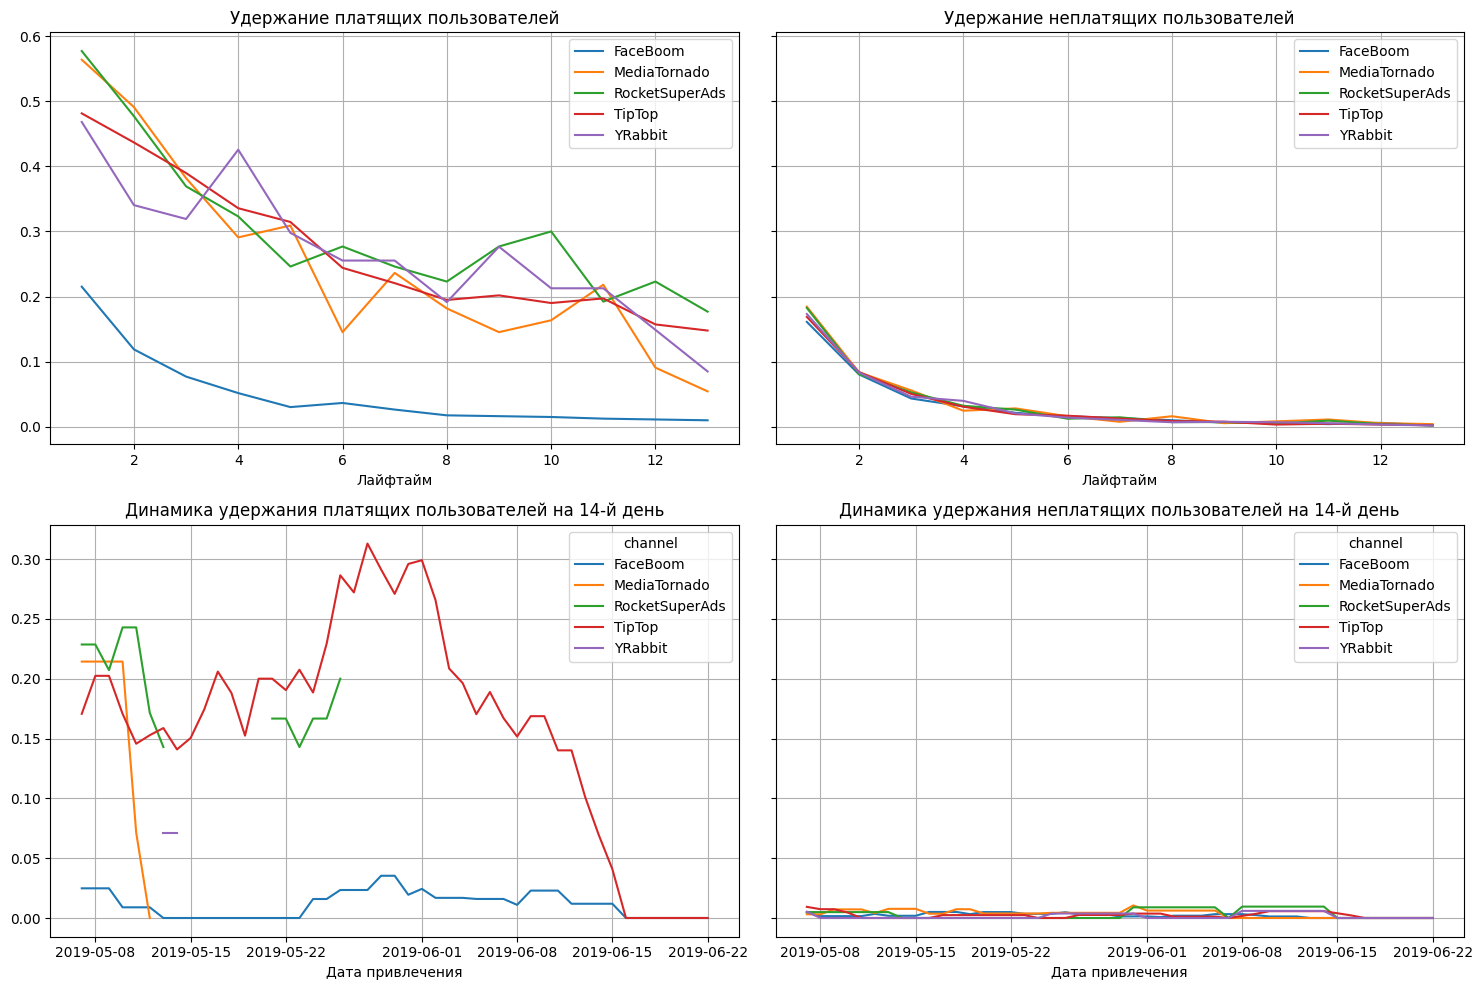

In [36]:
# удержание в разбивке по источникам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days)

По каналам AdNonSense и FaceBoom пользователи меньше всех удерживаются. А до этого мы видели, что наибольшее число платящих идет через FaceBoom,но они видимо надолго не остаются в приложении и быстрее всех с него уходят и еще наши траты на этот канал составляют треть всех расходов. Все остальные каналы удерживаются на одном уровне.

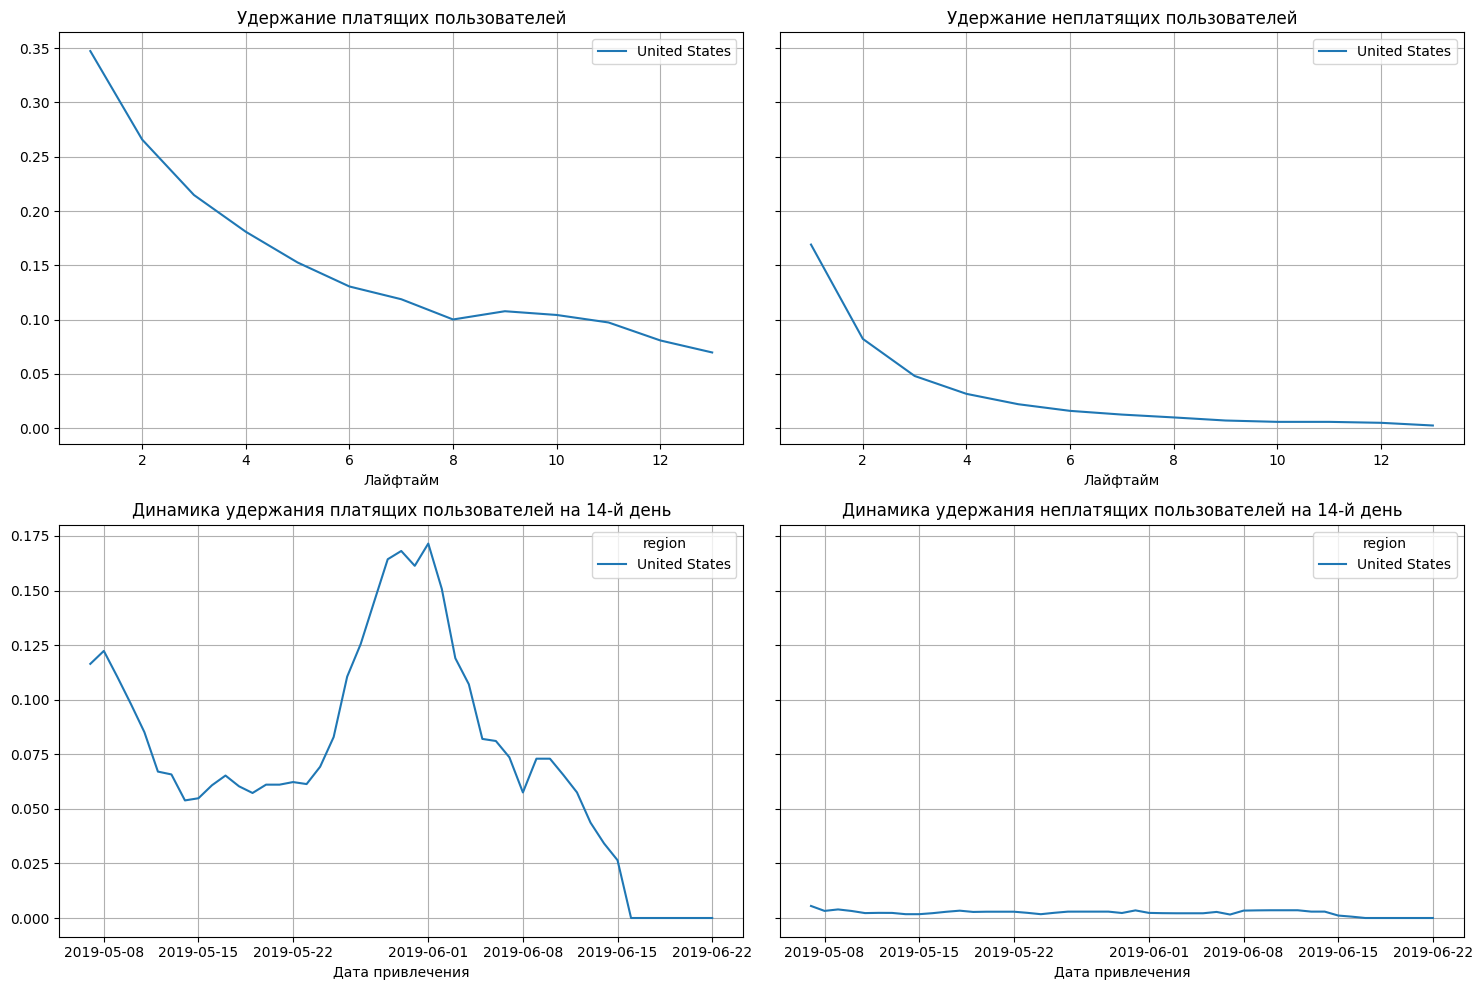

In [37]:
# удержание в разбивке по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention_grouped, retention_history, horizon_days)

Здесь по странам ярко выделяется США - удержание самое низкое из всех, а приходящих пользователей самое большое, т.е. клиенты приходят но не удерживаются, что негативно влияет на окупаемость.

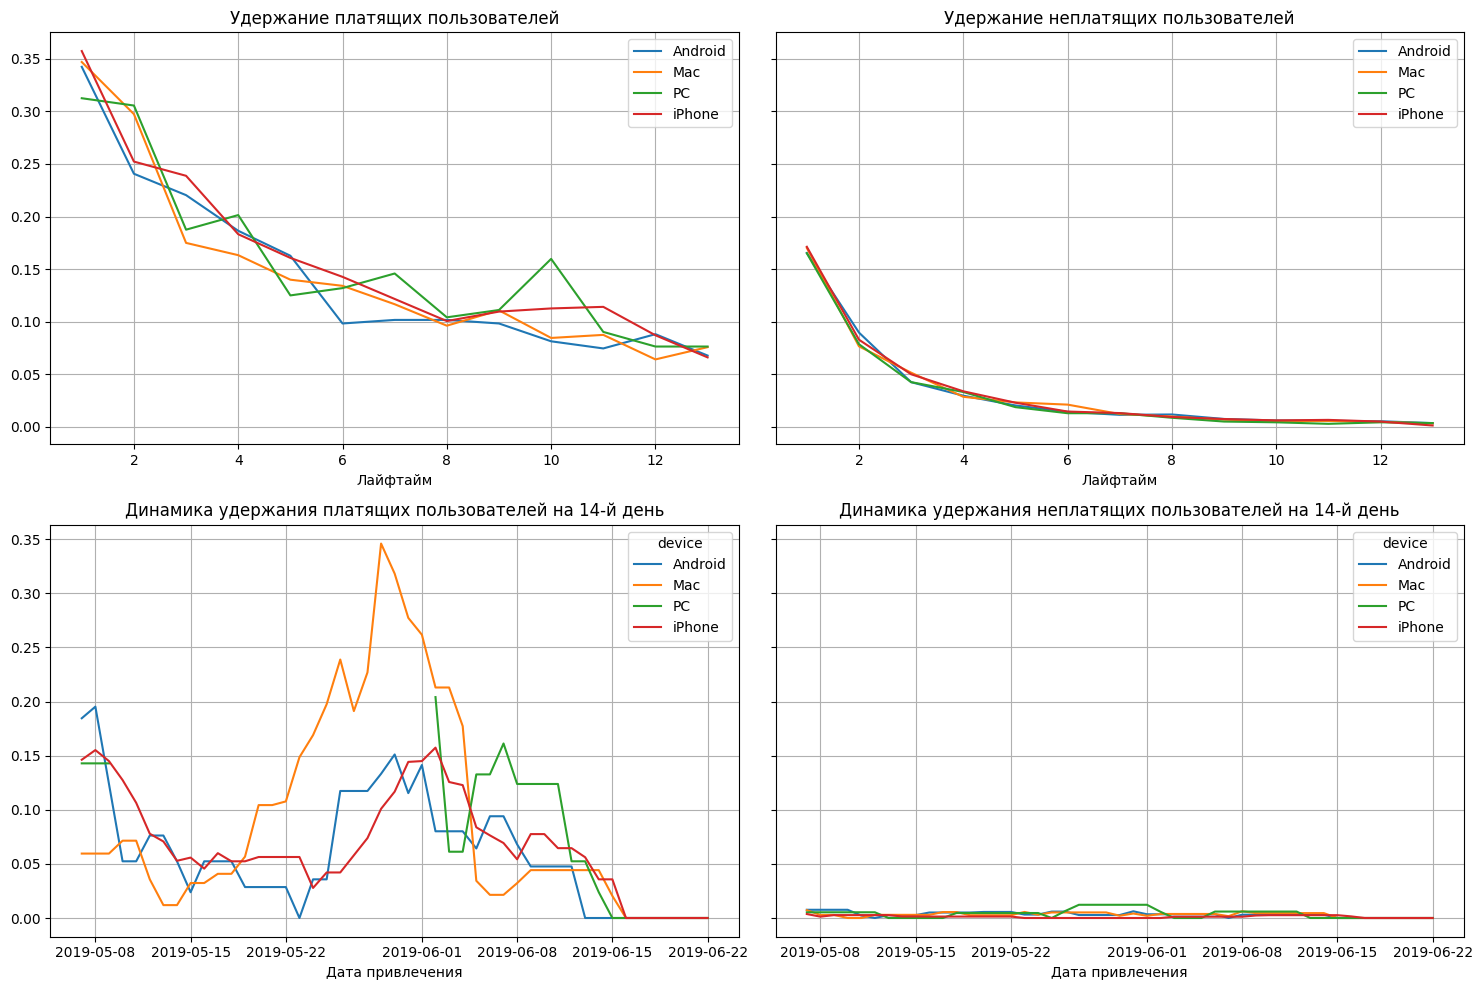

In [38]:
# удержание в разбивке по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention_grouped, retention_history, horizon_days)

По устройства видим, что все примерно равны - на одном уровне показатели удержания платящих, но чуть лучше показывает себя РС.

**Вывод:** Таким образом по показателю удержания худшими стали пользователи США, пришедших по каналам AdNonSense и FaceBoom через устройства Mac, Android и iPhone.

Далее посмотрим конверсию в общем и в разбивке по сегментам

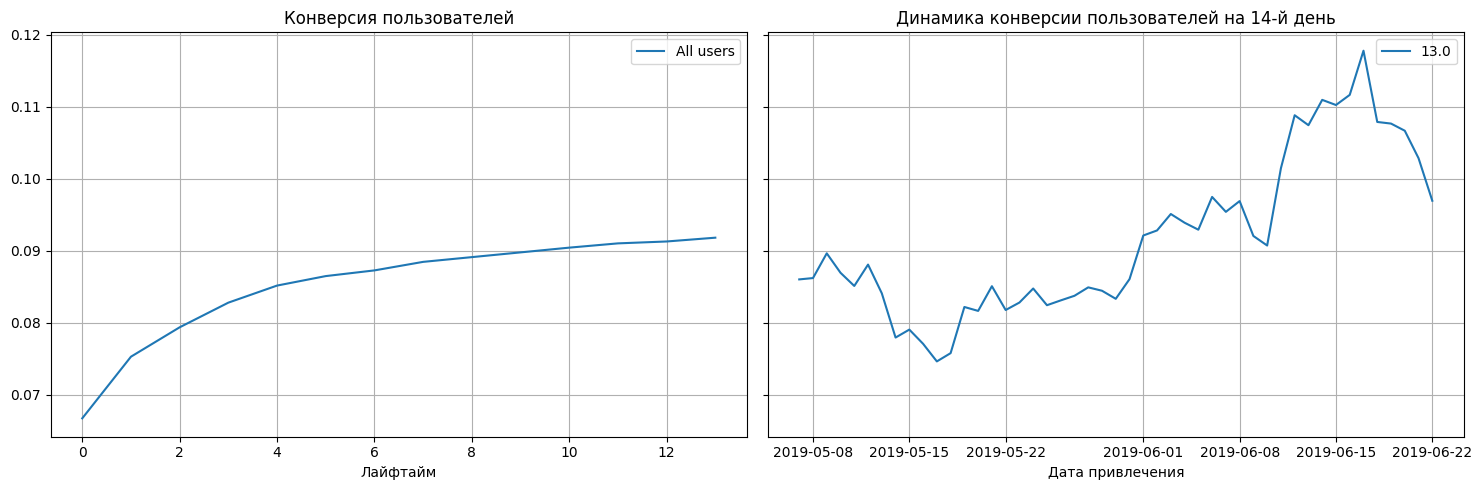

In [39]:
# считаем конверсию общую применив функцию conversion_raw()
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
# строим графики применив функцию plot_conversion()
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия плавно идет вверх, она посчитана верно и на 14 день составляет примерно 0.08.

Далее посмотрим её в разбивке по сегментам.

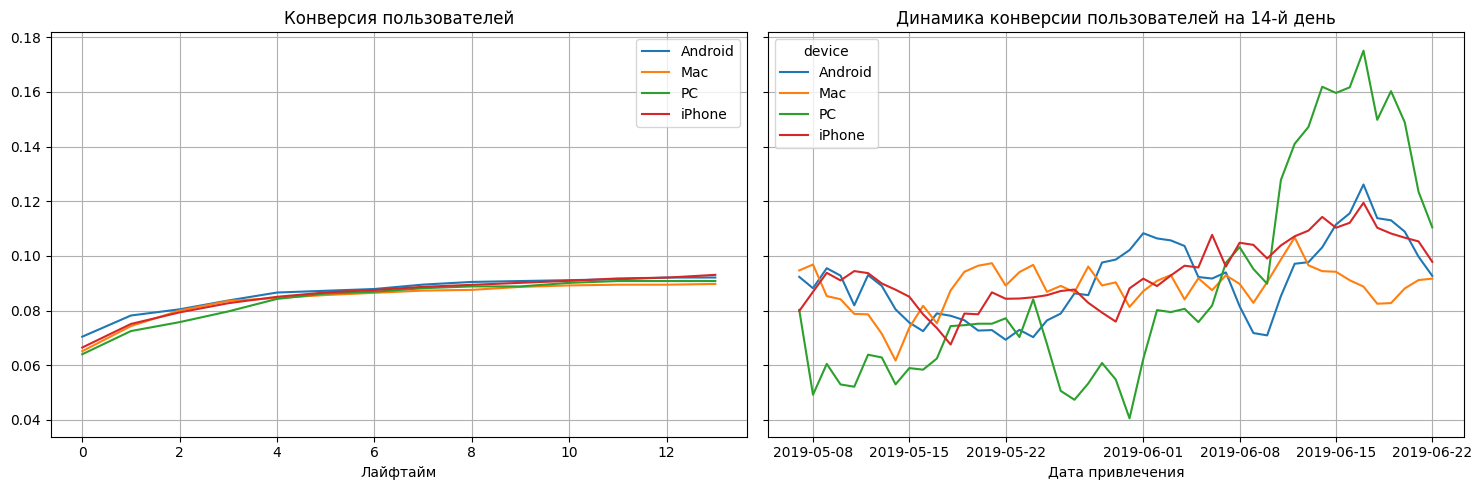

In [40]:
# считаем конверсию в разбивке по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

В разбивке по устройства видим, что показатель конверсии лучший у МАС и iPhone, а хуже у РС, хотя по показателю удержания все наоборот.

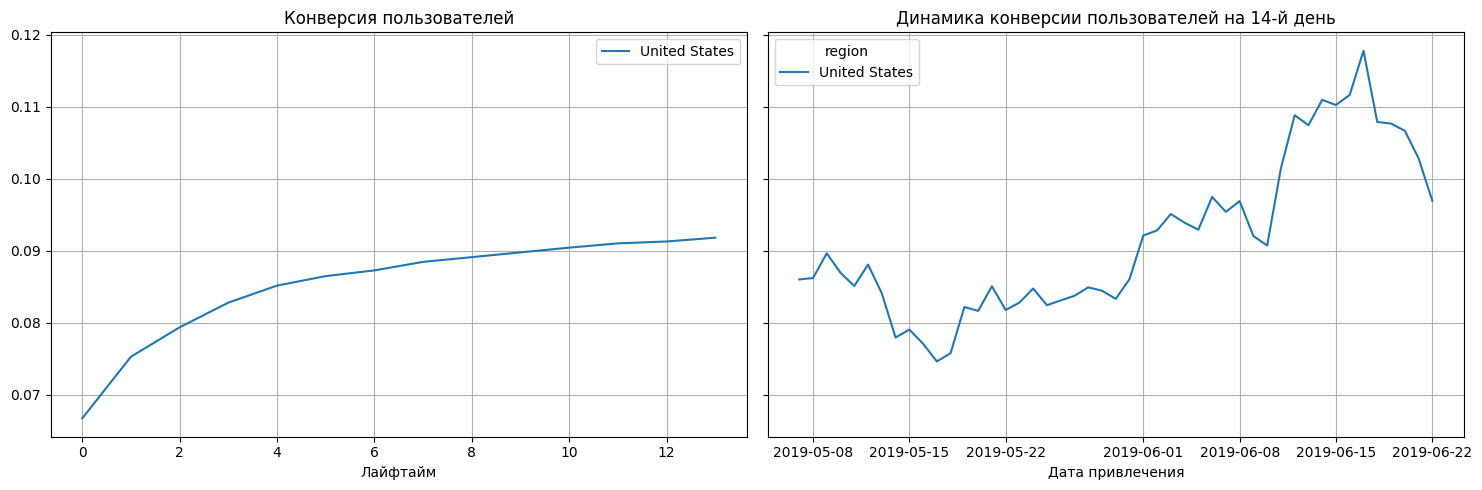

In [41]:
# считаем конверсию в разбивке по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Однозначно конвертируется пользователи лучше у США, но хуже всех удерживаются (пользователи других стран остаются дольше в приложении, чем у США).

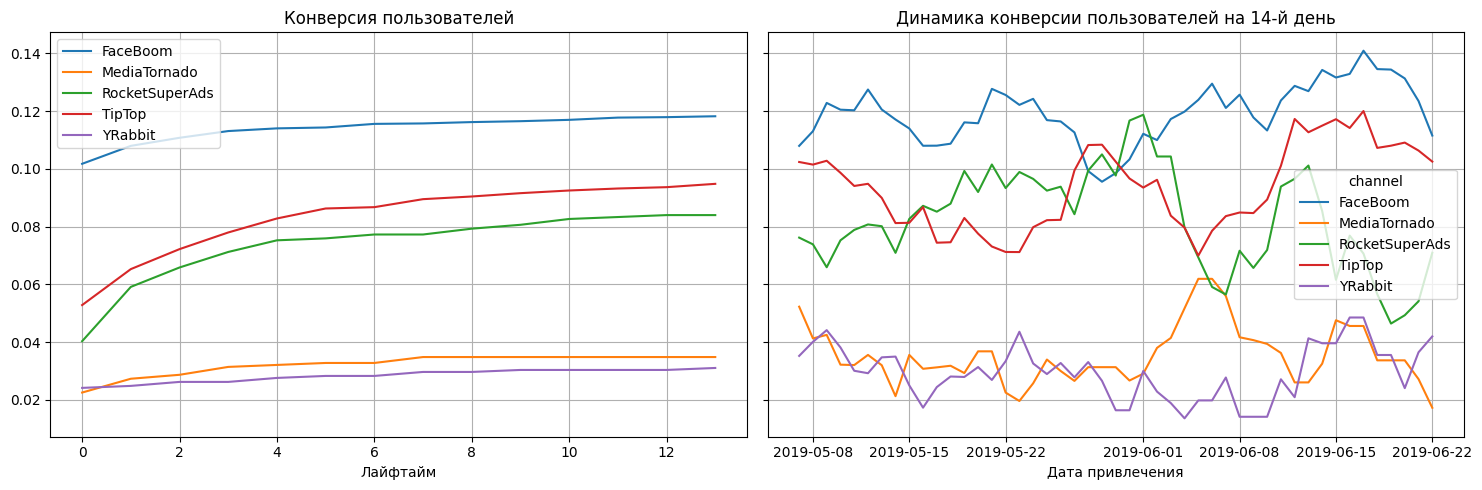

In [42]:
# считаем конверсию в разбивке по источникам рекламы
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия выше у рекламных источников AdNonSense, FaceBoom, lambdaMediaAds, TipTop и RocketSuperAds так же мы помним что доля платящих от общего числа каждого из этих каналов выше всех, поэтому и конверсия у них выше. Еще можно добавить, что AdNonSense, FaceBoom худшие по удержанию, FaceBoom и TipTop имеют 80% всех расходов.

Что касается остальных - худшая конверсия у OppleCreativeMedia, LeapBob, YRabbit, MediaTornado, но на них меньше всего расходов на одного пользователя - примерно 0.2.  Принесли они меньше всего платящих пользователей - просто потому что в них было мало вложений и соответственно пришло меньшее число пользователей. Может стоит к ним присмотреться и вложить туда больше средств, ведь расход на одного маленький, а удержание на хорошем уровне. Посмотрим далее по окупаемости и сделаем итоговые выводы.


**Вывод:** конверсия выше в США по устройствам МАС, iPhone и Android у каналов AdNonSense, FaceBoom, lambdaMediaAds, TipTop и RocketSuperAds,  так как наибольшее число пользователей пришло из них. Но не забываем про стоимость расходов по ним и про удержание.

Далее посмотрим окупаемость в разбивке по сегментам для выявления "худших" и "лучших" и сделаем в совокупности итоговые выводы.

### Проанализируем окупаемость рекламы с разбивкой по устройствам.

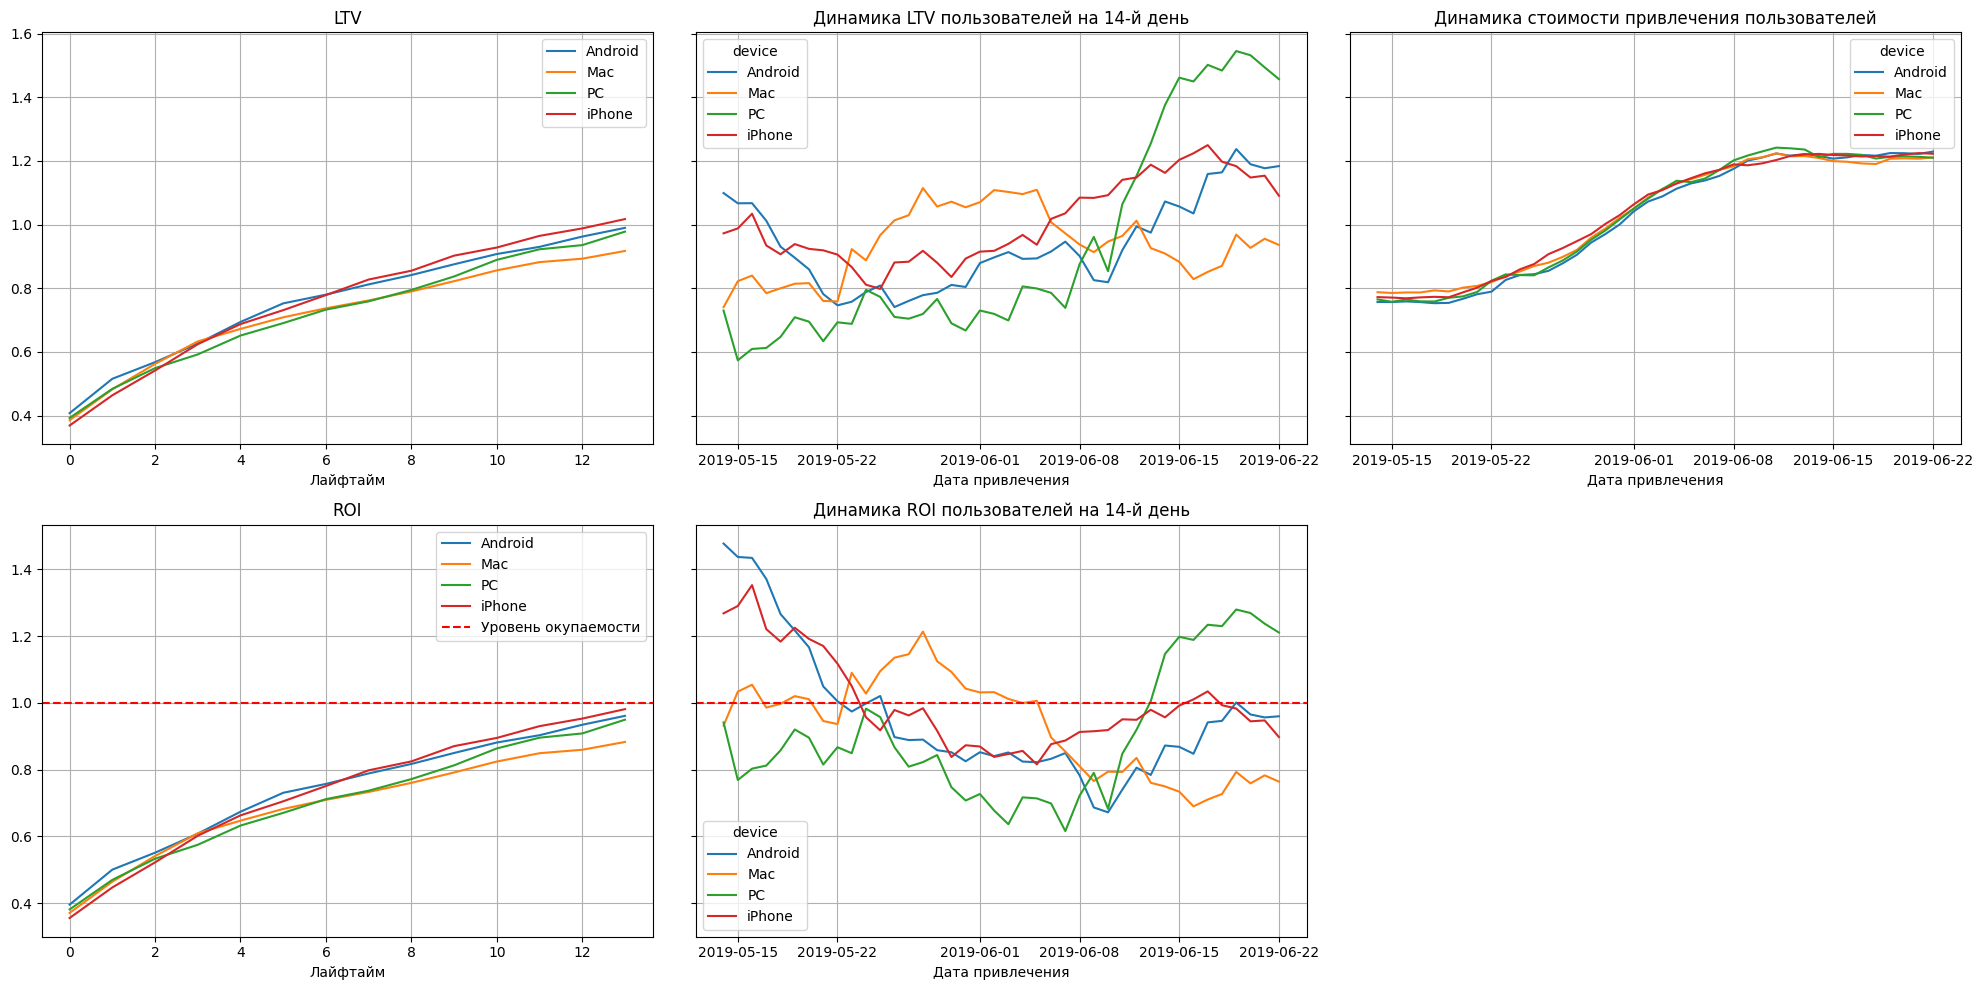

In [43]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

В разбивке по устройства реклама на "iPhone", "Мас" и "Android" не окупается совсем. Только на "РС" начиная с 12 дня выходит в "плюс". По графику динамики стоимости видно как она резко и вверх растет для "iPhone", "Мас", а по "РС" не значительно прибавляет.

### Проанализируем окупаемость рекламы с разбивкой по странам.

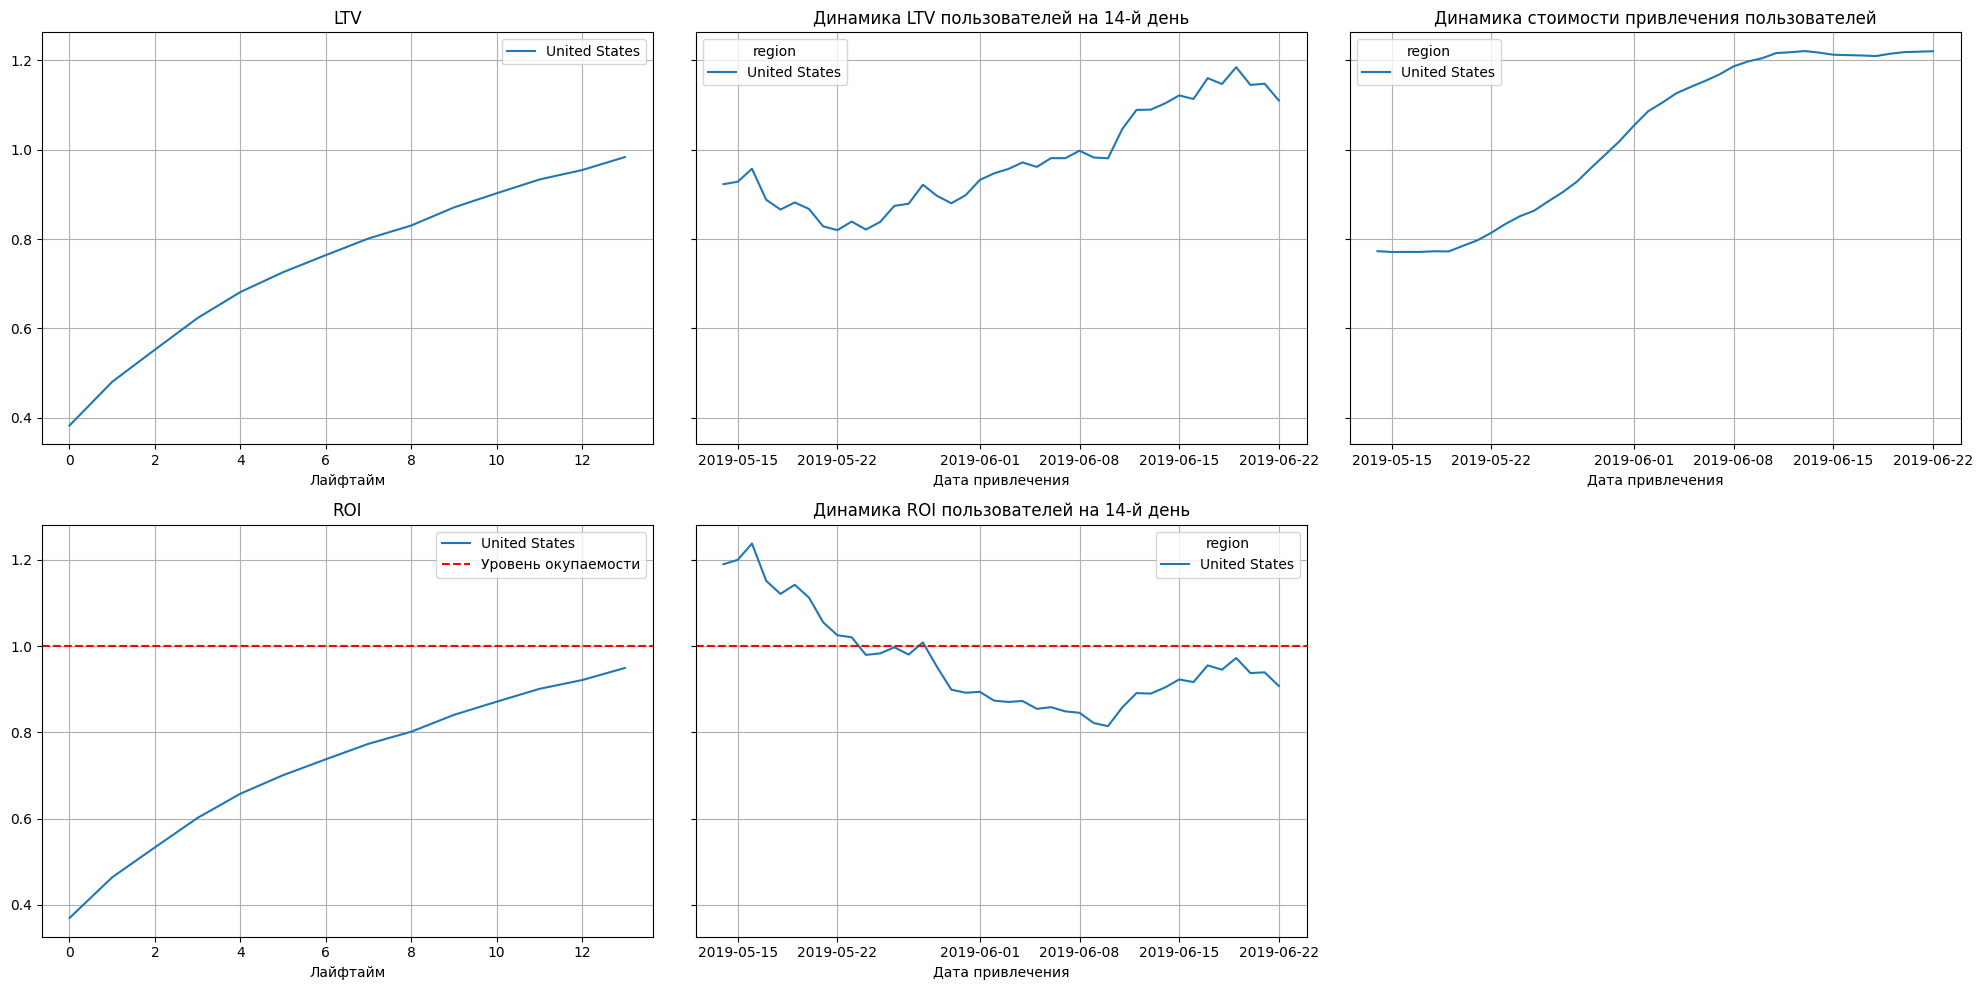

In [44]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

В разбивке по странама реклама в США не окупается совсем, хотя LTV у него лучше остальных, но этого недостаточно. В остальных странах начиная с 5 дня окупается реклама. По графику динамики стоимости видно как резко и вверх она растет в США, по сравнению с другими - у них стоимость привлечения пользователей находится у всех на одном низком уровне.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

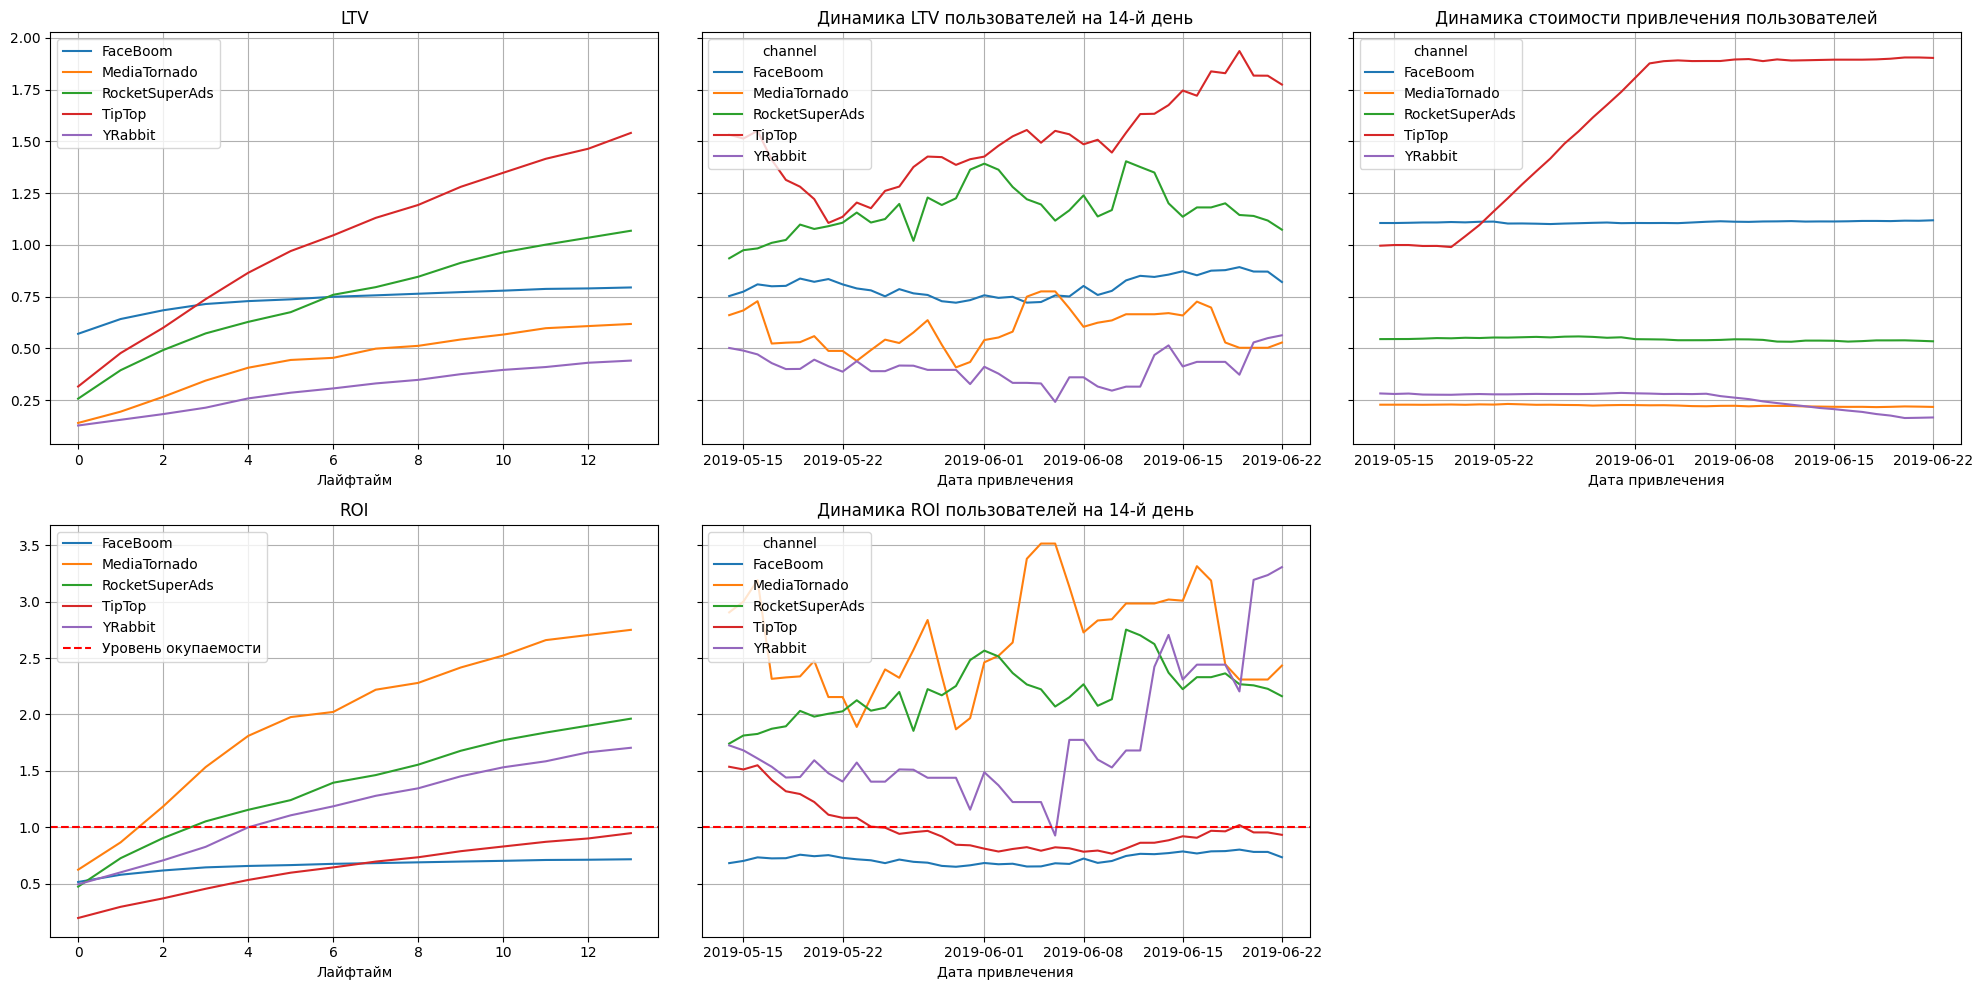

In [45]:
# смотрим окупаемость с разбивкой по источникам привлечения
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

В разбивке по каналам реклама в TipTop, FaceBoom, AdNonSense не окупается совсем и ранее мы видели что у них самая высокая стоимость расходов на одного пользователя, в особенности у TipTop, а удержание самое низкое у FaceBoom и AdNonSense, еще вспомним о 80% расходов только на TipTop, FaceBoom. В остальных каналах начиная с 5 дня реклама окупается, а выделяются каналы по показателю RIO - **YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds**. Также напомним, что именно в этих пяти каналах была самая низкая стоимоть привлечения на одного пользователя и удержание они показывают на хорошем уровне. По LTV лидирует **lambdaMediaAds**, TipTop, **RocketSuperAds**, WahooNetBanner, FaceBoom, AdNonSense. По графику динамики стоимости видно как резко и вверх она растет у TipTop, по сравнению с другими - у них стоимость привлечения пользователей находится у всех на одном уровне в течении времени.   

**Вывод:** Оценивая окупаемость рекламы мы увидели, что в целом она себя не окупает.
Разбив по странам, устройствам и источникам рекламы, увидели где именно идет "провал": рекламы в США на "iPhone", "Мас" и "Android" через каналы TipTop, FaceBoom, AdNonSense не окупаются совсем. Хотя наибольшее число пользователей приходит именно через них и платящих пользователей тоже. Получается компания вкладывает много денег на рекламу именно туда, ведь приходят больше пользователей от них и пытается конвертировать их в платящие, но результат от вложений маленький. Проблема состоит в том, что расходы на рекламу узконаправлены в большом количестве - выделить можно в особенности каналы TipTop и FaceBoom (более 80% расходов на них) из США (67% всех пользователей там).

Нужно присмотреться к **другим странам: Франции, Германии, Великобритании** (у последней окупаемость чуть выше остальных), устройствам и каналам привлечения, которые дают отдачу от вложений и соответственно перенаправить часть расходов на рекламу туда. Так например с высокой окупаемостью показали источники рекламы: YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds (так как удержание у них хорошее, стоимость на одного покупателя низкое), в особенности хочется отметить из них 2 канала - **lambdaMediaAds и RocketSuperAds**, так как ко всем предыдущим плюсам у них еще и LTV на высоком уровне. Если смотреть по устройствам, то лучший показатель только у **РС**, соответственно на него свой "взор" нужно направить. Также нужно посмотреть причины столь резкого увеличения расходов на рекламу в стране США на "iPhone" и "Мас" через каналы TipTop, FaceBoom возможно их можно как-то уменьшить и тем самым выйти в "плюс".

## Общий вывод

Мы посмотрели предоставленные нам данные. В целом в них все впорядке, предобработки большой не потребовалось. Чтобы выявить причины убытков компании, мы задали функции для расчетов необходимых показателей: LTV, ROI, САС, удержания и конверсии. Провели исслеовательский анализ данных и расчитали эти показатели.

Приложением Procrastinate Pro+ пользуются клиенты из США, Великобритании, Франции и Германии. США существенно опережают другие страны по количеству пользователей, в т.ч. платящих, но совсем себя не окупает. Потльзуются приложением через устройства: iPhonе, Mac, Android и PC. Лидирует среди устройств -iPhonе по числу привлеченных клиентов, хотя и тут она себя совсем не окупает, как и устройства Mac и Android. Компания использует 10 рекламных каналов для привлечения пользователей и наибольшее число платящих приносит TipTop, FaceBoom, но они также являются наиболее расходными каналами - более 80% всех расходов. TipTop, FaceBoom и еще AdNonSense совсем себя не окупают. Привлечение одного пользователя из канал TipTop обошлось компании в среднем в 2.8 ед., из FaceBoom и  AdNonSense - 1.1 ед., при этом на TipTop расходы резко увеличивались с каждым месяцем. Таким образом складывается наиболее **убыточный** и в тоже время наиболее приносящие большее количество клиентов **образ пользователей**: они из США, пользуются iPhonе, Mac и Android пришли через каналы TipTop, FaceBoom и AdNonSense.

Причиной обнаруженных проблем являются чрезмерные расходы на привлечение пользователей. Вложение больших средств туда, где отдача маленькая, т.е. эти средства себя не оправдывают. Можем предположить, что начиная с июня 2019 в США произошли какие-то события повлиявшие на стоимость услуг рекламы, в особенности неоправданно высокой по каналу TipTop (не нужно было много вкладывать в него). Также для Mac, IPhone и Android приложение скачивается, но в платящих пользователи не охотно переходят, расходы на них выше чем на PC. Может в данных устройствах есть технические или другие проблемы.

**Рекламному отделу развлекательного приложения Procrastinate Pro+ рекомендуется:**
- сократить финансирование на маркетинг:расходы на пользователей из США с устройством Mac, IPhone и Android по каналам TipTop, FaceBoom и AdNonSense.
- привлекать больше PC пользователей
- обратить внимание на дугие 5 каналов с высоким ROI - окупающих себя: YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds, в особенности на lambdaMediaAds и RocketSuperAds - у них по мимо низкой стоимости и высокой окупаемости еще самые высокие показатели LTV.
- нужно ориентироваться на привлечение пользователей из Германии, Франции и Великобритании - у последней выше окупаемость из всех
- также можно поискать новые источники рекламы во всех странах с наименьшими для компании расходами